In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
from scipy.spatial.distance import cdist

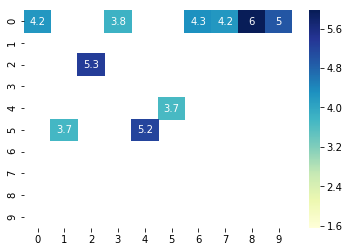

In [52]:
# sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap=sns.cubehelix_palette(as_cmap=True))
# sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap="YlGnBu")
distances = cdist(np.random.randn(10, 5), np.random.randn(10, 5))
dist_df = pd.DataFrame(distances)
cutoff = dist_df.quantile(q=0.9)
mask_arr = dist_df < cutoff
sns.heatmap(distances, mask = mask_arr, cmap="YlGnBu", annot=True)

TODO
# Pre-Grouping of Data

When working in a particular counter-terrorism context, it is natural to ask whether data from completely different circumstances is useful. Why, after all, should we think that terrorist attack data from Nigeria is useful in predicting attacks in the UK? 

In light of this, we will try to divide the dataset into chunks, so that an algorithm which seeks to predict 

1. Grouping by attribute, such as region or weapon type. 

2. Grouping by clustering, after applying a clustering algorithm to the points in $\mathbb{R}^{n}$.

## Affinity Along Attributes

We will first group the data by attribute, and then calculate pairwise distances from the means of each group. For example, there are 12 regions in the dataset. If we divide the 

In [1]:
from preprocess_functions import load_data_relevant_cols, get_dummies

In [2]:
raw = load_data_relevant_cols()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
traits_to_compare = ['region_txt', 'targtype1_txt', 'weaptype1_txt', 
                     'iyear', 'nkill', 'natlty1_txt']
dummies = get_dummies(raw, traits_to_compare)

The code below is somewhat involved, so it deserves some explanation. 

We want to display a heatmap which displays "affinity" of subsets of the data for one another. For example, we might divide the data by region, and then ask which regions are "similar" to one another with respect to $\ell_2$ distance in the vectorized space. 

1. For computational efficiency, we compute the distance of the means of the sub-groups rather than the average of pair-wise distances between each subgroup. Given that our dataset has over 170,000 attacks, the latter would be far too expensive to be feasible. 

2. We only display the lower triangular half of the pairwise distance matrix, because for any points $i, j$, the distance $d(i, j)$ and $d(j, i)$ are equal. We also don't display $d(i, i)$, because $d(i, i) = 0$ for all $i$. 

3. One of the arguments in the function below is ```percentile_cutoff```, which corresponds to the percentage of distance values that we want to display. Displaying distances below a certain percentile makes the heatmaps easier to read, as the goal of these is to explore which subsets of the data are most similar to one another. 

If we have $n$ regions then there are $n^{2}$ entries in the data. However, we don't display diagonal values, and only display the lower triangular half of each matrix, so we are only interested in $\frac{n(n - 1)}{2}$ of the values. In the function, we scale ```percentile_cutoff``` by $\frac{n(n - 1)}{2}$ to reflect this. 

In [131]:
def plot_affinity_heatmap(trait_str, colormap='ocean', percentile_cutoff = 0.2):     
    trait_labels = [label for label in dummies.columns.values if trait_str in label]
    trait_labels = [label for label in trait_labels if label not in [trait_str + 'Unknown', trait_str + 'Other']]
    num_subsets = len(trait_labels)
    means = []
    for label in trait_labels: 
        means.append(np.mean(dummies[dummies[label] == 1]).drop(index=trait_labels))
    plt.figure(figsize=(12, 8))
    plot_labels = [label.replace(trait_str, '')[:25] for label in trait_labels]
    distance_matrix = cdist(means, means)
    dist_df = pd.DataFrame(distance_matrix)
    cutoff = dist_df.quantile(q=percentile_cutoff * (0.5 * num_subsets * (num_subsets - 1))/(num_subsets**2))
    mask_arr = dist_df > cutoff 
    for i in range(len(mask_arr)): 
        for j in range(i + 1): 
            mask_arr[i][j] = True 
    sns.heatmap(cdist(means, means), cmap=colormap, xticklabels=plot_labels, 
                yticklabels=plot_labels, annot=True, mask=mask_arr)
    plt.title('Divergence of mean terrorist attacks: Top {} Percent'.format(int(percentile_cutoff * 100)))

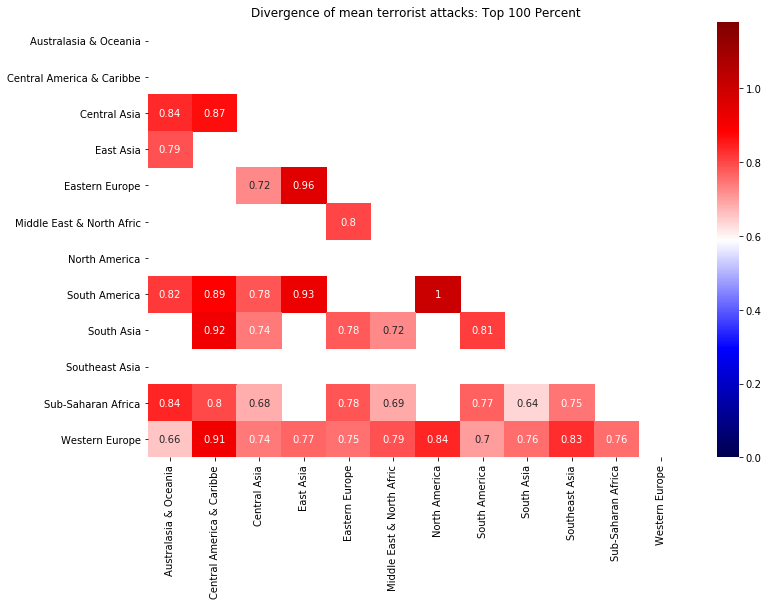

In [132]:
plot_affinity_heatmap('region_txt_', colormap='seismic', percentile_cutoff=1.0)

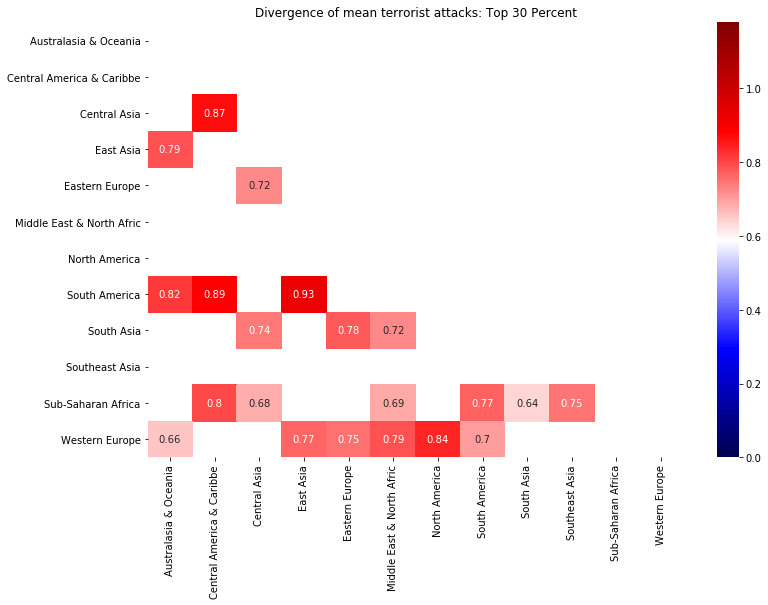

In [125]:
plot_affinity_heatmap('region_txt_', colormap='seismic', percentile_cutoff=0.3)

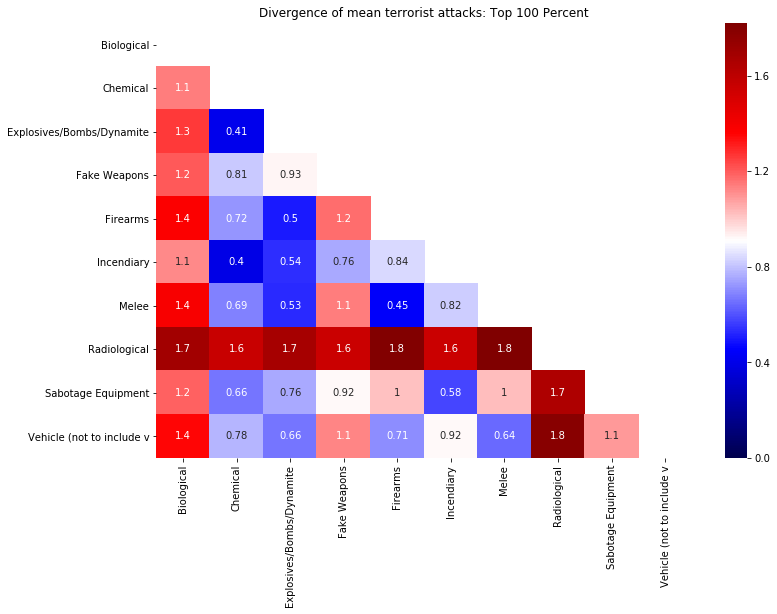

In [126]:
plot_affinity_heatmap('weaptype1_txt_', colormap='seismic', percentile_cutoff=1.0)

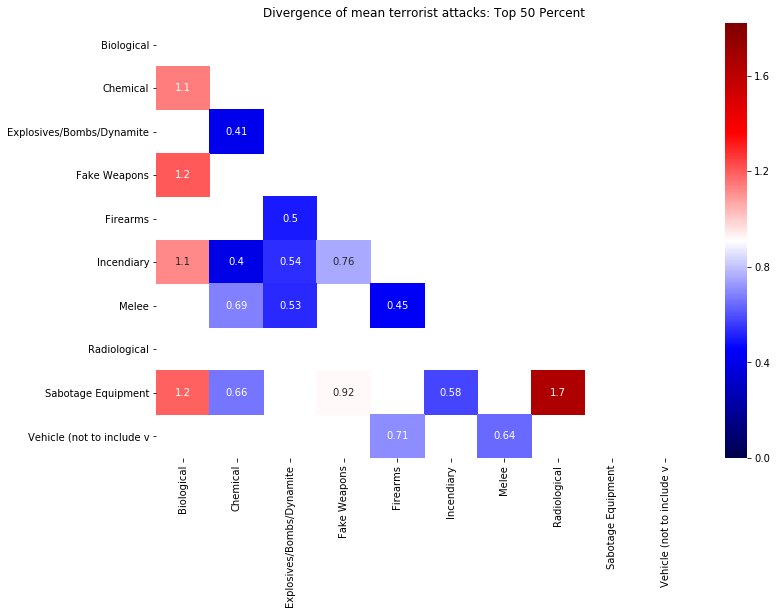

In [129]:
plot_affinity_heatmap('weaptype1_txt_', colormap='seismic', percentile_cutoff=0.25 * 2)

In [118]:
# todo: 
'''1. Preprocess the data so that it scales uniformly. Remember sqrt(2) rule 
2. k-means
3. normal clustering (DB-SCAN because of sparsity?)
4. SVM
5. k-nearest neighbors 
6. sensitivity analysis'''

l1 = ['unknown', 'hello']
l2 = ['unknown']
# [arg for arg in l1 if arg not in l2]

['hello']